In [ ]:
!pip install rdkit-pypi
!pip install git+https://github.com/samoturk/mol2vec;
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
import seaborn as sns
from mol2vec.features import mol2alt_sentence, MolSentence, DfVec, sentences2vec
from mol2vec.helpers import depict_identifier, plot_2D_vectors, IdentifierTable, mol_to_svg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 51.4 MB/s eta 0:00:00
  Cloning https://github.com/samoturk/mol2vec to /tmp/pip-req-build-7qgw2igg
  Running command git clone --filter=blob:none --quiet https://github.com/samoturk/mol2vec /tmp/pip-req-build-7qgw2igg
  Resolved https://github.com/samoturk/mol2vec to commit 850d944d5f48a58e26ed0264332b5741f72555aa
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.2 MB/s eta 0:00:00
  Created wheel for mol2vec: filename=mol2vec-0.1-py3-none-any.whl size=14016 sha256=d3bf4120c59ab9ba8445182ba735d23269b6fd786d8fefa6240596435a86e54c
  Stored in directory: /tmp/pip-ephem-wheel-cache-__ezwe90/wheels/b9/bd/e0/b6dd7c5e346247e8d6944e08ca1c262a908231747f4efa539d
Successfully built mol2vec


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import sys, os

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd()))+'/mol2vec')

from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole

from mol2vec.features import mol2alt_sentence, mol2sentence, MolSentence, DfVec, sentences2vec
from gensim.models import word2vec


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Suzuki_Project/Suzuki_classification.csv')
# df.head()

#df = pd.read_csv('Suzuki_classification.csv')

In [ ]:
from gensim.models import word2vec
model = word2vec.Word2Vec.load('/content/drive/MyDrive/Suzuki_Project/model_300dim.pkl')
#model = word2vec.Word2Vec.load('model_300dim.pkl')

In [ ]:
mol2vec_R1 = []
for i in df['Reactant_1']:
  if i != '0':
    mol = mol2alt_sentence(Chem.MolFromSmiles(i), 1)
    embedding = model.wv[mol]
    total = np.sum(embedding,axis=0)
    mol2vec_R1.append(total)
  else:
    mol2vec_R1.append(np.zeros(100))

mol2vec_R2 = []
for i in df['Reactant_2']:
  if i != '0':
    try:
      mol = mol2alt_sentence(Chem.MolFromSmiles(i), 1)
      embedding = model.wv[mol]
      total = np.sum(embedding,axis=0)
      mol2vec_R2.append(total)
    except:
      mol.remove('3235557127')
      embedding = model.wv[mol]
      total = np.sum(embedding,axis=0)
      mol2vec_R2.append(total)
  else:
    mol2vec_R2.append(np.zeros(100))

mol2vec_Ligand = []
for i in df['Ligand']:
  if i != '0':
    mol = mol2alt_sentence(Chem.MolFromSmiles(i), 1)
    for i in mol:
      if i not in model.wv.key_to_index.keys():
        mol.remove(i)
    embedding = model.wv[mol]
    total = np.sum(embedding,axis=0)
    mol2vec_Ligand.append(total)
  else:
    mol2vec_Ligand.append(np.zeros(100))

mol2vec_Reagent = []
count = 0
for i in df['Reagent']:
  if i != '0':
    mol = mol2alt_sentence(Chem.MolFromSmiles(i), 1)
    for i in mol:
      if i not in model.wv.key_to_index.keys():
        mol.remove(i)
    embedding = model.wv[mol]
    total = np.sum(embedding,axis=0)
    mol2vec_Reagent.append(total)
  else:
    mol2vec_Reagent.append(np.zeros(100))

mol2vec_Reagent = np.array(mol2vec_Reagent)
mol2vec_Reagent.shape

mol2vec_Solvent = []
for i in df['Solvent']:
  if i != '0':
    mol = mol2alt_sentence(Chem.MolFromSmiles(i), 1)
    embedding = model.wv[mol]
    total = np.sum(embedding,axis=0)
    mol2vec_Solvent.append(total)
  else:
    mol2vec_Solvent.append(np.zeros(100))

In [ ]:
mol2vec_R1 = np.array(mol2vec_R1)
mol2vec_R2 = np.array(mol2vec_R2)
mol2vec_Ligand = np.array(mol2vec_Ligand)
mol2vec_Reagent = np.array(mol2vec_Reagent)
mol2vec_Solvent = np.array(mol2vec_Solvent)

In [ ]:
print(np.shape(mol2vec_R1))
print(np.shape(mol2vec_R2))
print(np.shape(mol2vec_Ligand))
print(np.shape(mol2vec_Reagent))
print(np.shape(mol2vec_Solvent))

(5760, 100)
(5760, 100)
(5760, 100)
(5760, 100)
(5760, 100)


In [ ]:
from numpy.linalg import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from rdkit import DataStructs
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from scipy import stats
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import resample
from numpy import linalg as LA

concatenated = np.concatenate((mol2vec_R1,mol2vec_R2,mol2vec_Ligand,mol2vec_Reagent,mol2vec_Solvent),axis=1)
concatenated = np.array(concatenated)

X =concatenated
y = np.array(df[['Success']].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = LogisticRegression(random_state = 0)
scores = cross_val_score(clf, X_train, y_train, cv=5)
Logistic_score = np.mean(scores)
print('Logistic Regression CV score: ' + str(np.mean(scores)))

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Logistic_score_test = accuracy_score(y_test, y_pred)
print('Logisitic regression test score: ' + str(Logistic_score_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Logistic Regression CV score: 0.7986089815606444
Logisitic regression test score: 0.8098958333333334


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X_train, y_train, cv=5)
knn_score = np.mean(scores)
print('knn CV score: ' + str(np.mean(scores)))

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_score_test = accuracy_score(y_test, y_pred)
print('KNN test score: ' + str(knn_score_test))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

knn CV score: 0.7489199940647367


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN test score: 0.7612847222222222


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, y_train, cv=5)
rf_score = np.mean(scores)
print('Random Forest CV score: ' + str(np.mean(scores)))

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_score_test = accuracy_score(y_test, y_pred)
print('Random Forest test score: ' + str(rf_score_test))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Random Forest CV score: 0.8947475275624676


<ipython-input-12-aa1b83b42b4c>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Random Forest test score: 0.9131944444444444


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
scores = cross_val_score(gbc, X_train, y_train, cv=5)
gbc_score = np.mean(scores)
print('Gradient Boosting Classifier CV score: ' + str(np.mean(scores)))

gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

gbc_score_test = accuracy_score(y_test, y_pred)
print('Gradient Boosting Classifier test score: ' + str(gbc_score_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Gradient Boosting Classifier CV score: 0.8602417442137072


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Classifier test score: 0.8810763888888888


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
scores = cross_val_score(gnb, X_train, y_train, cv=5)
nb_score = np.mean(scores)
print('Gaussian NB CV score: ' + str(np.mean(scores)))

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

gnb_score_test = accuracy_score(y_test, y_pred)
print('Gaussian NB test score: ' + str(gnb_score_test))

Gaussian NB CV score: 0.7250423358558201


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Gaussian NB test score: 0.7248263888888888


In [ ]:
from sklearn.svm import SVC

svc = SVC()
scores = cross_val_score(svc, X_train, y_train, cv=5)
svc_score = np.mean(scores)
print('Support vector classifier CV score: ' + str(np.mean(scores)))

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

svc_score_test = accuracy_score(y_test, y_pred)
print('Support vector classifier test score: ' + str(svc_score_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Support vector classifier CV score: 0.7489082177487922


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support vector classifier test score: 0.7751736111111112


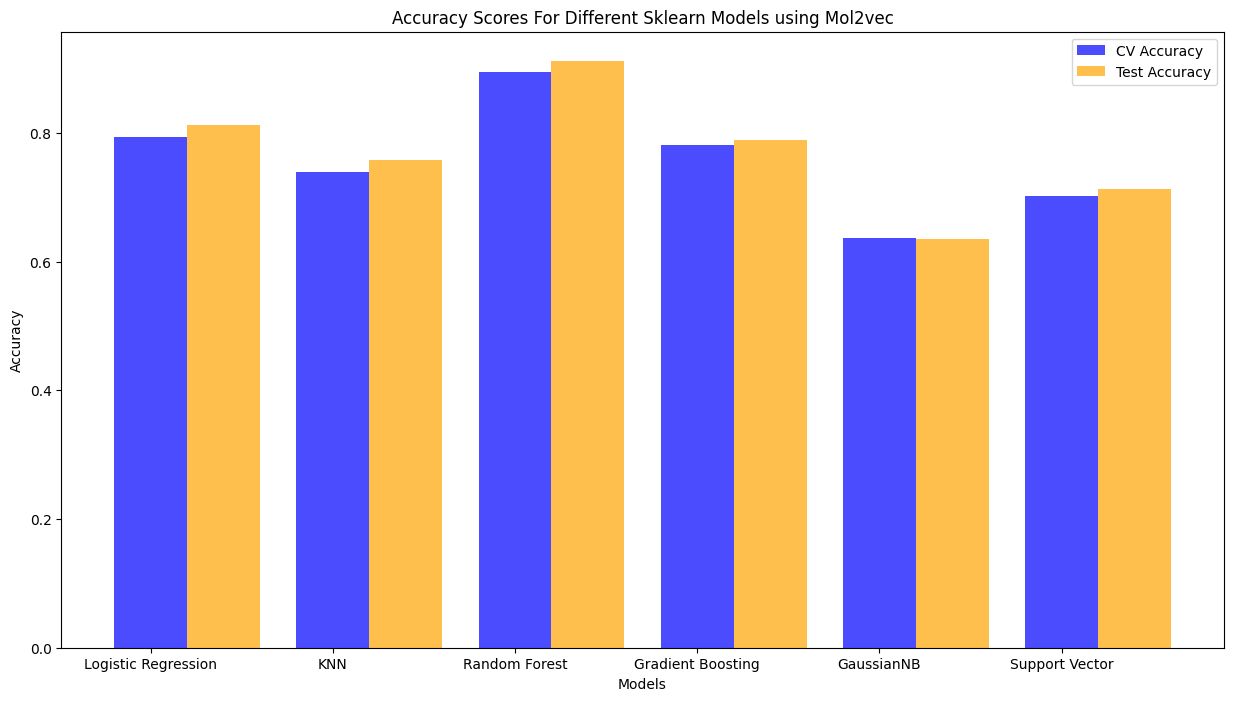

In [ ]:
models = ['Logistic Regression','KNN','Random Forest','Gradient Boosting','GaussianNB','Support Vector']
CV_scores = [Logistic_score,knn_score,rf_score,gbc_score,nb_score,svc_score]
test_scores = [Logistic_score_test,knn_score_test,rf_score_test,gbc_score_test,gnb_score_test,svc_score_test]

plt.figure(figsize=(15,8))
plt.bar(models, CV_scores, color='blue', alpha=0.7, label='CV Accuracy', width=0.4)
plt.bar(np.arange(len(models)) + 0.4, test_scores, color='orange', alpha=0.7, label='Test Accuracy', width=0.4)
plt.title('Accuracy Scores For Different Sklearn Models using Mol2vec')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

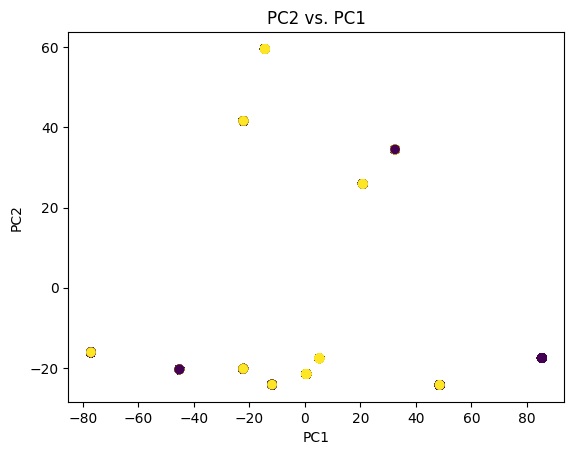

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# Project data onto two principal components
pca_df = pca.fit_transform(X)

plt.scatter(pca_df[:,0], pca_df[:,1],c=df['Success'])
plt.title('PC2 vs. PC1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
summed_vectors = np.sum([mol2vec_R1,mol2vec_R2,mol2vec_Ligand,mol2vec_Reagent,mol2vec_Solvent],axis=0)
X = summed_vectors
y = np.array(df[['Success']].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = LogisticRegression(random_state = 0)
scores = cross_val_score(clf, X_train, y_train, cv=5)
Logistic_score = np.mean(scores)
print('Logistic Regression CV score: ' + str(np.mean(scores)))

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Logistic_score_test = accuracy_score(y_test, y_pred)
print('Logisitic regression test score: ' + str(Logistic_score_test))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X_train, y_train, cv=5)
knn_score = np.mean(scores)
print('knn CV score: ' + str(np.mean(scores)))

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_score_test = accuracy_score(y_test, y_pred)
print('KNN test score: ' + str(knn_score_test))

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, y_train, cv=5)
rf_score = np.mean(scores)
print('Random Forest CV score: ' + str(np.mean(scores)))

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_score_test = accuracy_score(y_test, y_pred)
print('Random Forest test score: ' + str(rf_score_test))

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
scores = cross_val_score(gbc, X_train, y_train, cv=5)
gbc_score = np.mean(scores)
print('Gradient Boosting Classifier CV score: ' + str(np.mean(scores)))

gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

gbc_score_test = accuracy_score(y_test, y_pred)
print('Gradient Boosting Classifier test score: ' + str(gbc_score_test))

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
scores = cross_val_score(gnb, X_train, y_train, cv=5)
nb_score = np.mean(scores)
print('Gaussian NB CV score: ' + str(np.mean(scores)))

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

gnb_score_test = accuracy_score(y_test, y_pred)
print('Gaussian NB test score: ' + str(gnb_score_test))

from sklearn.svm import SVC

svc = SVC()
scores = cross_val_score(svc, X_train, y_train, cv=5)
svc_score = np.mean(scores)
print('Support vector classifier CV score: ' + str(np.mean(scores)))

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

svc_score_test = accuracy_score(y_test, y_pred)
print('Support vector classifier test score: ' + str(svc_score_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Logistic Regression CV score: 0.7931836328050478
Logisitic regression test score: 0.8116319444444444


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using

knn CV score: 0.7391543663046627
KNN test score: 0.7578125


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Random Forest CV score: 0.795574460468085


<ipython-input-19-492fc2bb253f>:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Random Forest test score: 0.7994791666666666


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Gradient Boosting Classifier CV score: 0.7810318879083142


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Classifier test score: 0.7881944444444444
Gaussian NB CV score: 0.6371523925941104
Gaussian NB test score: 0.6345486111111112


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Support vector classifier CV score: 0.7013813618602811


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support vector classifier test score: 0.7126736111111112


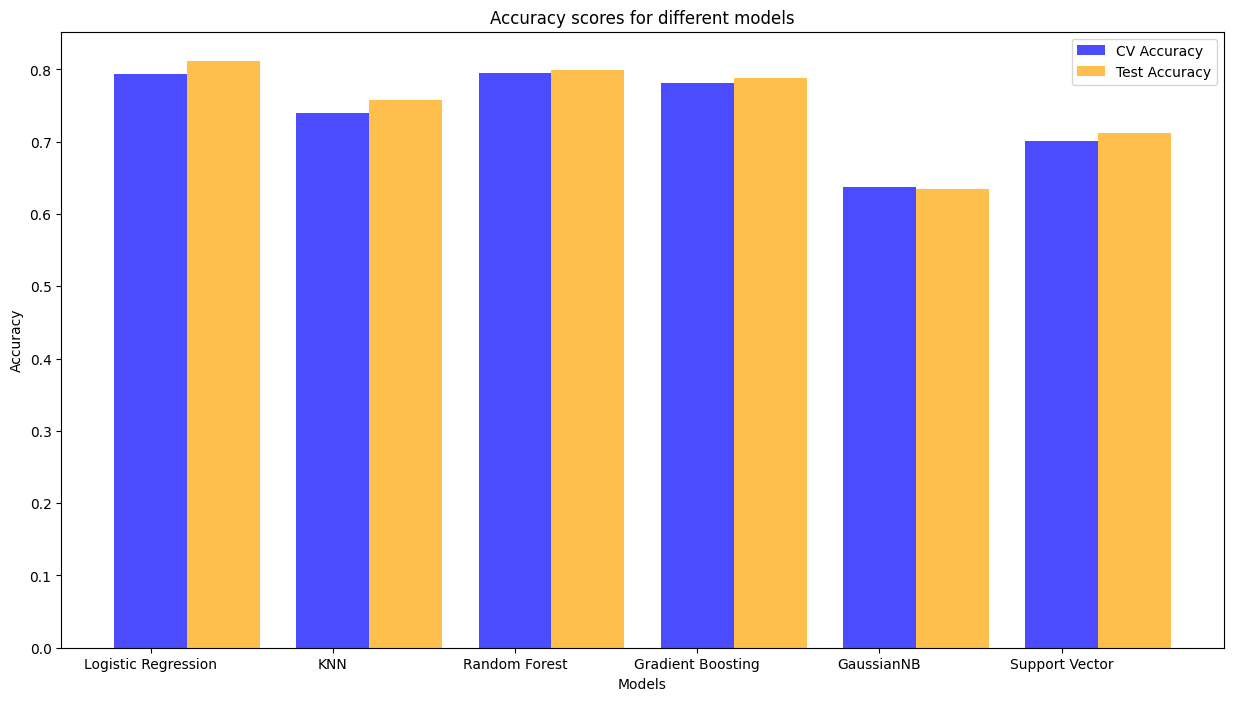

In [ ]:
models = ['Logistic Regression','KNN','Random Forest','Gradient Boosting','GaussianNB','Support Vector']
CV_scores = [Logistic_score,knn_score,rf_score,gbc_score,nb_score,svc_score]
test_scores = [Logistic_score_test,knn_score_test,rf_score_test,gbc_score_test,gnb_score_test,svc_score_test]

plt.figure(figsize=(15,8))
plt.bar(models, CV_scores, color='blue', alpha=0.7, label='CV Accuracy', width=0.4)
plt.bar(np.arange(len(models)) + 0.4, test_scores, color='orange', alpha=0.7, label='Test Accuracy', width=0.4)
plt.title('Accuracy scores for different models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from numpy.linalg import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from rdkit import DataStructs
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from scipy import stats
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import resample
from numpy import linalg as LA

concatenated = np.concatenate((mol2vec_R1,mol2vec_R2,mol2vec_Ligand,mol2vec_Reagent,mol2vec_Solvent),axis=1)
concatenated = np.array(concatenated)

X =concatenated
y = np.array(df[['Success']].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# DL
from keras import models
from keras import optimizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import metrics


model = Sequential()
#First layer input dimension must match the number of descriptors you are using.
#Activation functions are set in each layer
#First number is the number of neurons in that layer
model.add(Dense(400, input_dim = 500, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#Compile your model
model.compile(loss='binary_crossentropy',#The loss function you will optimize against
              optimizer = optimizers.Adam(learning_rate=0.01),#The optimizer you will use
              metrics=['accuracy'] #The performance metrics you want to store during training
              )

history = model.fit(X_train,
          y_train, #The x and y training data to fit to
          batch_size = 16, #Neural network batch size
          epochs = 100, #Number of epochs to train for
          verbose = 1 #Don't print anything to screen while training
          )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               200400    
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 300801 (1.15 MB)
Trainable params: 300801 (1.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
288/288 [==============================] - 2s 5ms/step - loss: 0.9424 - accuracy: 0.6766
Epoch 2/100
288/288 [==============================

In [ ]:
y_pred_test = model.predict(X_test, verbose = 0)
y_pred_train = model.predict(X_train, verbose = 0)

# Calculate accuracy
metric = tf.keras.metrics.BinaryAccuracy()
metric.update_state(y_test,y_pred_test)
test_score = metric.result().numpy()

metric.update_state(y_train,y_pred_train)
train_score = metric.result().numpy()

print('train accuracy: ' + str(train_score))
print('test accuracy: ' + str(test_score))

train accuracy: 0.82447916
test accuracy: 0.8324653


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, y_train, cv=5)
rf_score = np.mean(scores)
print('Random Forest CV score: ' + str(np.mean(scores)))

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_score_test = accuracy_score(y_test, y_pred)
print('Random Forest test score: ' + str(rf_score_test))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Random Forest CV score: 0.8940955907117841


<ipython-input-24-aa1b83b42b4c>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Random Forest test score: 0.9114583333333334


In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [ ]:
(tn, fp, fn, tp)

(465, 55, 47, 585)

In [ ]:
y_test.shape

(1152, 1)

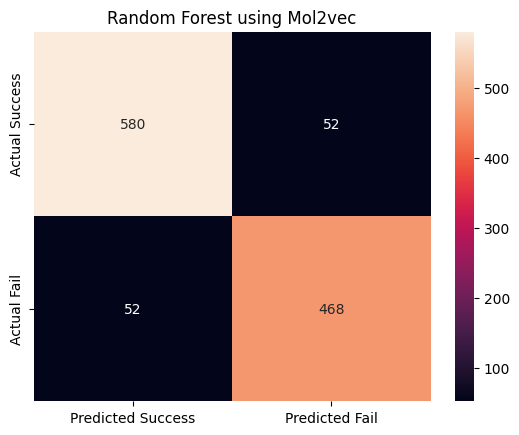

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

xlabels =['Predicted Success', 'Predicted Fail']
ylabels =['Actual Success', 'Actual Fail']
array = [[580,52],[52,468]]
ax = sn.heatmap(data = array,xticklabels=xlabels,yticklabels=ylabels,fmt='g', annot=True)
plt.title('Random Forest using Mol2vec')
plt.show()

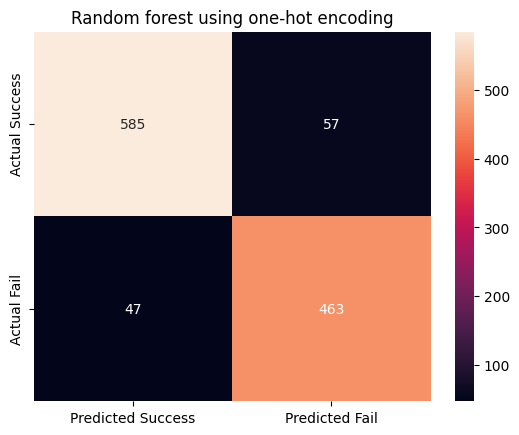

In [ ]:
array = [[585,57],[47,463]]
ax = sn.heatmap(data = array,xticklabels=xlabels,yticklabels=ylabels,fmt='g', annot=True)
plt.title('Random forest using one-hot encoding')
plt.show()

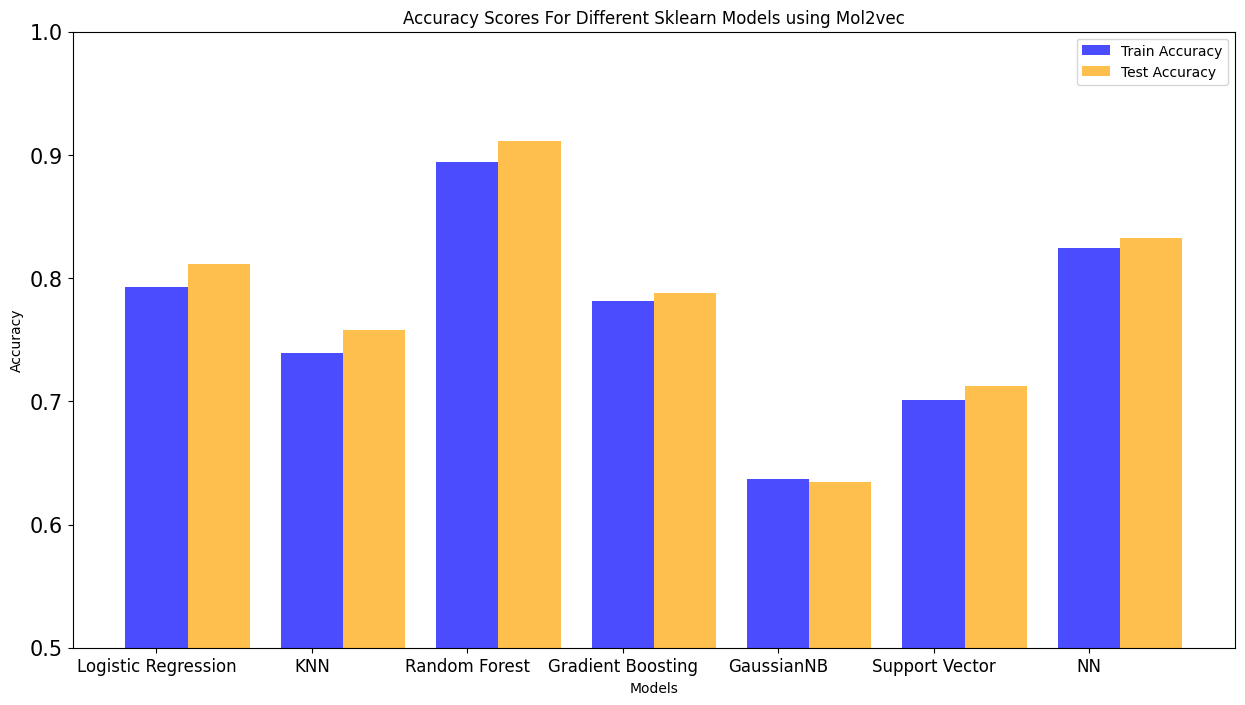

In [ ]:
models = ['Logistic Regression','KNN','Random Forest','Gradient Boosting','GaussianNB','Support Vector', 'NN']
CV_scores = [Logistic_score,knn_score,rf_score,gbc_score,nb_score,svc_score,train_score]
test_scores = [Logistic_score_test,knn_score_test,rf_score_test,gbc_score_test,gnb_score_test,svc_score_test, test_score]

plt.figure(figsize=(15,8))
plt.bar(models, CV_scores, color='blue', alpha=0.7, label='Train Accuracy', width=0.4)
plt.bar(np.arange(len(models)) + 0.4, test_scores, color='orange', alpha=0.7, label='Test Accuracy', width=0.4)
plt.title('Accuracy Scores For Different Sklearn Models using Mol2vec')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=12)
plt.ylim(0.5, 1)
plt.legend()
plt.show()